## Plotting results of the performance and scalibility tests

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Dataset sizes
dataset_sizes = ["1K", "10K", "100K"]

# Component execution times
input_times = [0.1, 0.11, 0.11]
preprocess_times = [0.04, 0.04, 0.04]
generation_times = [0.14, 0.57, 5.35]
diagnostic_times = [0.06, 0.05, 0.06]
privacy_times = [0.14, 1.06, 9.46]
quality_times = [0.1, 3.54, 5.59]

In [10]:
# Convert total pipeline times to minutes
total_times_str = ["5:07", "1:37", "16:00"]
total_times = [int(t.split(":")[0]) + int(t.split(":")[1]) / 60 for t in total_times_str]

# Stack data for grouped and stacked plots
components = ["Input Data Loading", "Preprocessing & Metadata Extraction", "Synthetic Data Generation", "Diagnostic Evaluation Report", "Privacy Evaluation Report", "Quality Evaluation Report"]
data_matrix = np.array([input_times, preprocess_times, generation_times,
                        diagnostic_times, privacy_times, quality_times])

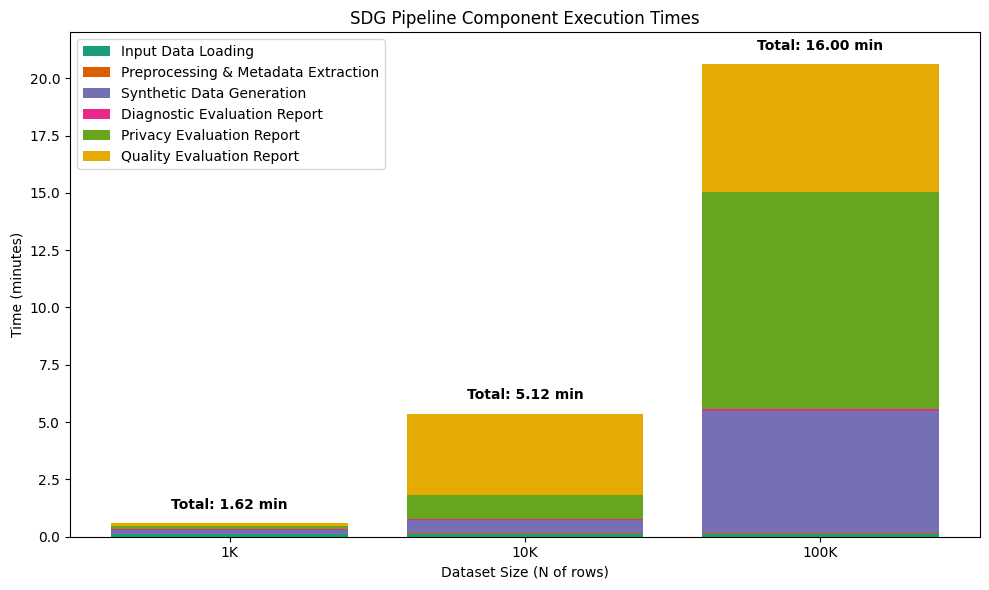

In [16]:
total_times = [1 + 37/60, 5 + 7/60, 16]  # in minutes

# Example component colors
colors = [
    "#1b9e77",  # teal
    "#d95f02",  # orange
    "#7570b3",  # purple
    "#e7298a",  # pink
    "#66a61e",  # green
    "#e6ab02",  # mustard
]

# Create plot
plt.figure(figsize=(10, 6))
bottom = np.zeros(len(dataset_sizes))

# Stack bars
for idx, label in enumerate(components):
    plt.bar(dataset_sizes, data_matrix[idx], bottom=bottom, label=label, color=colors[idx])
    bottom += data_matrix[idx]

# Add total execution time labels above bars
for i, total in enumerate(total_times):
    plt.text(i, bottom[i] + 0.5, f"Total: {total:.2f} min", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.ylim(0, max(total_times) + 6)

plt.title("SDG Pipeline Component Execution Times")
plt.xlabel("Dataset Size (N of rows)")
plt.ylabel("Time (minutes)")
plt.legend()
plt.tight_layout()
plt.show()

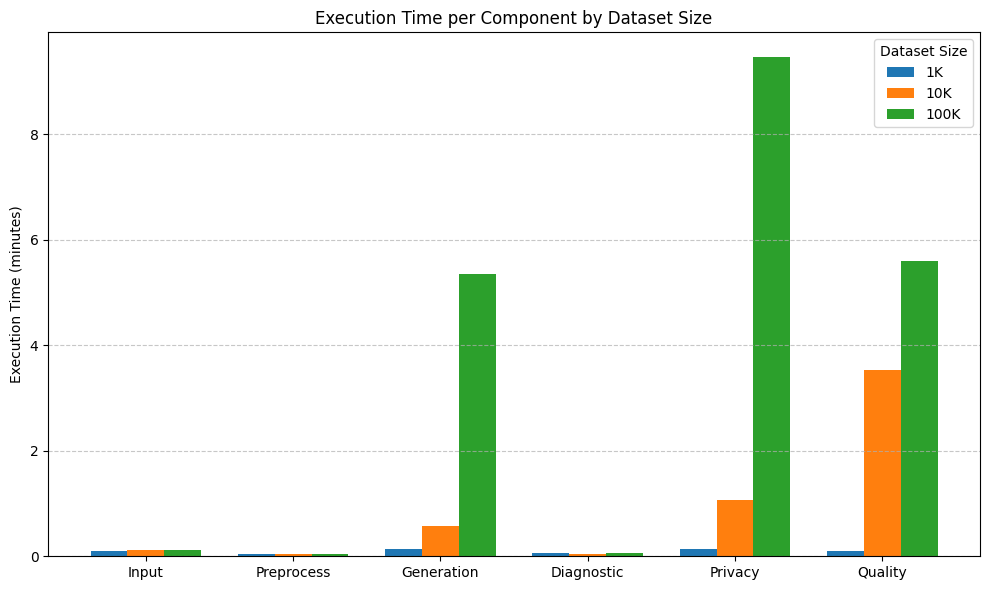

In [5]:
# Plotting per component instead of per dataset size

# Transpose the data so each group on the x-axis is a component
data_by_component = data_matrix.T  # shape becomes (3 datasets, 6 components)

x = np.arange(len(components))  # component positions
width = 0.25  # width of each bar

# --- Bar Plot with Components on X-axis ---
plt.figure(figsize=(10, 6))
plt.bar(x - width, data_by_component[0], width, label='1K')
plt.bar(x, data_by_component[1], width, label='10K')
plt.bar(x + width, data_by_component[2], width, label='100K')

plt.xticks(x, components)
plt.ylabel("Execution Time (minutes)")
plt.title("Execution Time per Component by Dataset Size")
plt.legend(title="Dataset Size")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

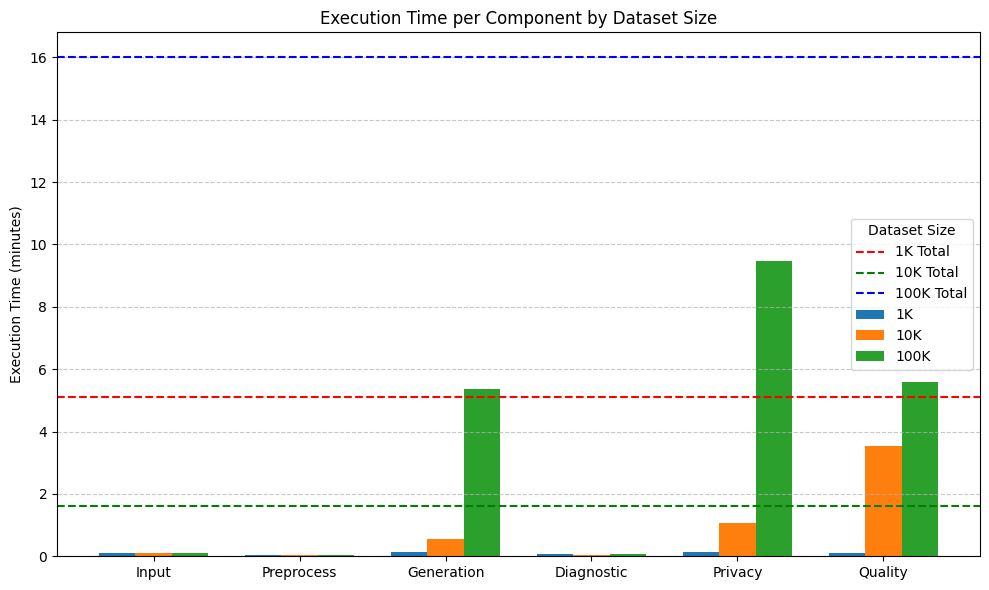

In [7]:
total_times = [1 + 37/60, 5 + 7/60, 16]

plt.figure(figsize=(10, 6))
plt.bar(x - width, data_by_component[0], width, label='1K')
plt.bar(x, data_by_component[1], width, label='10K')
plt.bar(x + width, data_by_component[2], width, label='100K')

# Overlay horizontal lines
plt.axhline(total_times[0], color='red', linestyle='--', label='1K Total')
plt.axhline(total_times[1], color='green', linestyle='--', label='10K Total')
plt.axhline(total_times[2], color='blue', linestyle='--', label='100K Total')

plt.xticks(x, components)
plt.ylabel("Execution Time (minutes)")
plt.title("Execution Time per Component by Dataset Size")
plt.legend(title="Dataset Size")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


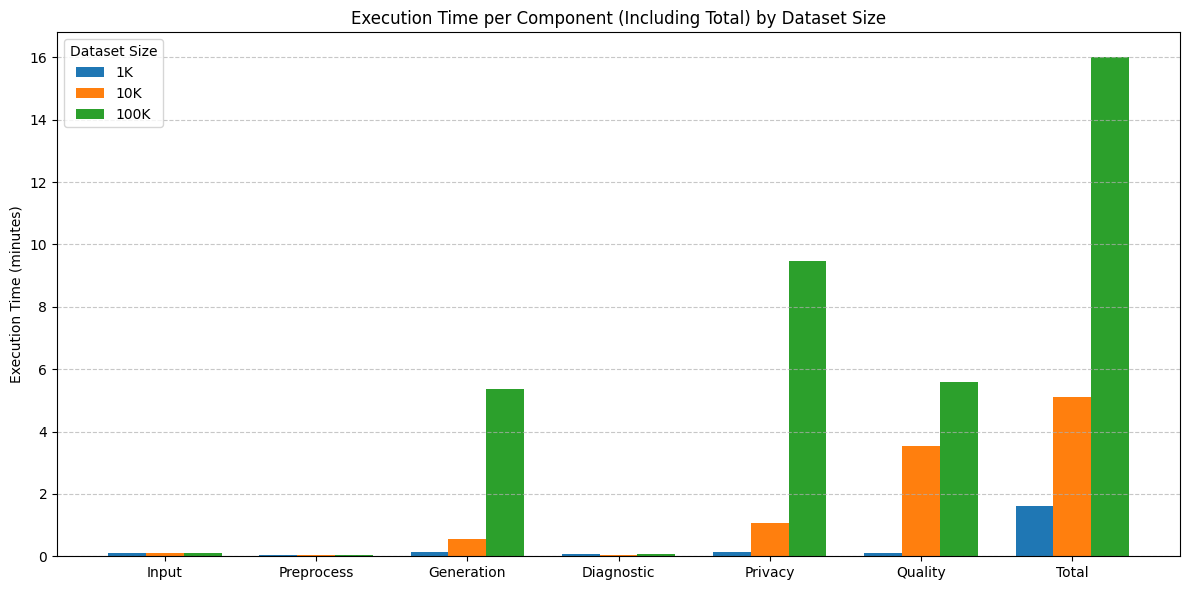

In [9]:
components_with_total = components + ["Total"]

# Execution times (same order as components)
data_1k = [0.1, 0.04, 0.14, 0.06, 0.14, 0.1, 1 + 37/60]
data_10k = [0.11, 0.04, 0.57, 0.05, 1.06, 3.54, 5 + 7/60]
data_100k = [0.11, 0.04, 5.35, 0.06, 9.46, 5.59, 16]

data_matrix = np.array([data_1k, data_10k, data_100k])
data_by_component = data_matrix.T  # shape becomes (7 components, 3 datasets)

x = np.arange(len(components_with_total))
width = 0.25

plt.figure(figsize=(12, 6))
plt.bar(x - width, data_by_component[:, 0], width, label='1K')
plt.bar(x, data_by_component[:, 1], width, label='10K')
plt.bar(x + width, data_by_component[:, 2], width, label='100K')

plt.xticks(x, components_with_total)
plt.ylabel("Execution Time (minutes)")
plt.title("Execution Time per Component (Including Total) by Dataset Size")
plt.legend(title="Dataset Size")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
